# Canadian house price analysis
## Sections

## Motivation
Recent inflation number and house price records have constantly make news. This report is inspired by [the analysis carried out by Bank of Canada in 2015](https://www.bankofcanada.ca/2015/08/long-term-evolution-house-prices/) using more up-to-date data from Statistics Canada.

## Data importation and cleaning

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set_theme()

### Importing data

In [4]:
pwd = os.getcwd()
#Load main data
df = pd.read_csv(pwd+'\\data\\raw\\housing\\18100205.csv',header = 0)
#Get table of metadata
df_md = pd.read_csv(pwd+'\\data\\raw\\housing\\18100205_MetaData.csv',header = 0, skiprows =7,nrows = 43)

### Data cleaning 

In [5]:
#Change REF_DATE into yyyy-mm date type
df['Month'] = pd.to_datetime(df.REF_DATE)
#Get data for all Canada
df_Can = df[(df.GEO == "Canada") ]
#Condition to get total houe value: df["New housing price indexes"].str.contains('Total')
#Get provinces name from metadata file
unique_province_id = df_md['Parent Member ID'].unique()
provinces_names = df_md[(df_md['Member ID'].isin(unique_province_id)) & (df_md['Dimension ID']==1) \
    & ~(df_md['Member ID'].isin([1,2,28]))]['Member Name']
#Get a dictionary province_df to store each province data where keys are name of provinces, values are dictionary
province_df = {}
for name in provinces_names:
    province_df[name] = df[df.GEO == name]

## Data exploration

### Overview of Canada and the provinces from 1990
**Findings**
- From 1990, new house price index (NHPI) remained relatively stable during 1990-1999, grew linearly during 2010-2018, experienced exponential growth during 2000-2008 and 2019-2021. Suprisingly, Canada's NHPI is only minimally affected by financial crisis in 2008.
- The order of the NHPI among the top 5 provinces remained consistent during 1990-2005 period where the order follows as BC, QC, ON (close second), AB, SK. During 2006-2019, it can be observed that new house prices in the Prairies increase dramatically, and the top 5 provinces remain similar level of NHPI. However, from 2019, we can observe a bifurcation of NHPI among the 5 into 2 groups: ON, BC, QC vs AB and SK.


Text(0.5, 1.0, 'NHPI for total house value from 1990 to 2022')

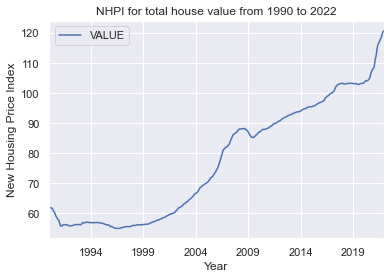

In [51]:
#Extract total house value data of entire Canada
total = df_Can[(df_Can['New housing price indexes'].str.contains('Total')) & (df_Can['Month'] >= '01-1990')]
lay1 = total.plot(x = 'Month',y = 'VALUE')
plt.xlabel('Year')
plt.ylabel('New Housing Price Index')
plt.title('NHPI for total house value from 1990 to 2022')

Text(0, 0.5, 'New Housing Price Index')

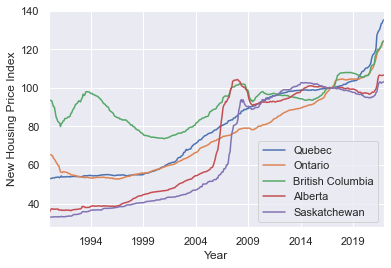

In [56]:
#Comparing top 5 highest GDP provinces to the Canada
quebec = province_df['Quebec']
quebec = quebec[(quebec['New housing price indexes'].str.contains('Total')) &(quebec['Month']>='01-1990')]
layqc = quebec.plot(x = 'Month',y = 'VALUE')

ontario = province_df['Ontario']
ontario = ontario[(ontario['New housing price indexes'].str.contains('Total')) &(ontario['Month']>='01-1990')]
layon = ontario.plot(x = 'Month',y = 'VALUE', ax = layqc)

bc = province_df['British Columbia']
bc = bc[(bc['New housing price indexes'].str.contains('Total')) &(bc['Month']>='01-1990')]
laybc = bc.plot(x = 'Month',y = 'VALUE', ax = layon)

ab = province_df['Alberta']
ab = ab[(ab['New housing price indexes'].str.contains('Total')) &(ab['Month']>='01-1990')]
layab = ab.plot(x = 'Month',y = 'VALUE', ax = laybc)

sk = province_df['Saskatchewan']
sk = sk[(sk['New housing price indexes'].str.contains('Total')) &(sk['Month']>='01-1990')]
laysk = sk.plot(x = 'Month',y = 'VALUE', ax = layab)

plt.legend(['Quebec','Ontario','British Columbia', 'Alberta','Saskatchewan'])
plt.xlabel('Year')
plt.ylabel('New Housing Price Index')
